# **Step 1: Importing the libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


# **Step 2: Loading the dataset**

**1. Loading train.csv**

In [2]:
df_train=pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")

* Here I have loaded the training data that is in "train.csv" to 'df_train'.

**2. Loading test.csv**

In [3]:
df_test=pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

* Here I have loaded the testing data that is in "test.csv" to 'df_test'.

# **Step 3: EDA**

* EDA is used to understand the given data by performing certain procedure and apply some functions to get insights of the dataset.

**1. **Examining the tranining data****

In [4]:
df_train.head(2)

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1


* Here we have seen the top 2 rows and some columns  of the "train.csv" dataset.
* There are 76 columns with 75 independent variables and 1 dependent variable.
* Dependent column name is 'target'.
* This is the classification problem.

In [5]:
df_train.shape

(100000, 76)

* Here we get the shape of our "train.csv" dataset.
* There are 100000 rows and 76 columns in the dataset.

In [6]:
df_train.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,...,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,...,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,...,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,...,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,...,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,...,556.000000,52357.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,0.0,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,...,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


* df_train.describe() gives us discription of the "train.csv" dataset such count of rows, mean of the columns(numerical) and many more deatils.
* We clearly see that many columns have different values of count. There will be many missing data in the "train.csv" dataset.

In [7]:
df_train.describe(include=['object'])

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,PlatformType,Processor,OSVersion,OsPlatformSubRelease,OSBuildLab,...,OSBranch,OSEdition,OSSkuFriendlyName,OSInstallType,AutoUpdateOptionsName,OSGenuineState,LicenseActivationChannel,FlightRing,DateAS,DateOS
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,99976
unique,99835,2,37,69,2735,4,3,7,9,281,...,13,20,18,9,6,4,6,7,2695,112
top,8e0523438a5ca48323f50b2c47f6d31a,win8defender,1.1.15200.1,4.18.1807.18075,1.273.1420.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail,2018-08-15 06:29:00,2018-08-14
freq,2,99771,45219,62119,1274,98344,91262,98368,45837,42964,...,46909,39275,39273,32033,45154,89860,52195,94153,1274,20905


* In above code we have described the categorical columns of the "train.csv" dataset.
* We get to know about the unique values of the categorical columns.
* MachineID has the highest number of unique values i.e 99835.

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

* Here we get the information about the datatypes of the columns data of the "train.csv" dataset.
* There are 31 float64 columns, 17 int64 columns and 28 object columns.
* Which conclude that there are 48 numerical columns and 28 categorical columns. 

**2. Examining the testing data**

In [9]:
df_test.head(2)

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,c2c61173092ad20db5585ca8c10de6e0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1276.0,0,7.0,0,53447.0,1.0,...,48751.0,0,0.0,0,0,0.0,1.0,11.0,2018-08-12 13:12:00,2018-07-10
1,2e6bb5362ba1ce897feeb1de5edea686,win8defender,1.1.15100.1,4.10.209.0,1.273.371.0,0,7.0,0,46184.0,2.0,...,64709.0,1,0.0,0,0,0.0,0.0,12.0,2018-07-26 06:54:00,2016-10-11


* Here we have seen the top 2 rows and some columns of the "test.csv" dataset.
* There is no "target" column as it is a test data.

In [10]:
df_test.shape

(10000, 75)

* Here we get the shape of our "test.csv" dataset.
* There are 10000 rows and 75 columns in the dataset.
* 75 columns means 1 column less than "train.csv" dataset.
* That one column is "target" column.

**3. Checking for null values**

a) In "train.csv" 

In [11]:
print(df_train.isnull().sum()[df_train.isnull().sum() >0])

RealTimeProtectionState                66
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
CityID                                623
IsSystemProtected                      76
SMode                                 981
IEVersionID                           107
FirewallEnabled                       166
EnableLUA                              19
OEMNameID                             212
OEMModelID                            228
ProcessorCoreCount                     85
ProcessorManufacturerID                85
ProcessorModelID                       85
PrimaryDiskCapacityMB                 110
PrimaryDiskType                        23
SystemVolumeCapacityMB                110
TotalPhysicalRAMMB                    151
ChassisType                             2
PrimaryDisplayDiagonalInches           72
PrimaryDisplayResolutionHorizontal     72
PrimaryDisplayResolutionVertical       72
InternalBatteryNumberOfCharges    

* Here we get names of the columns and total number of null values in the "train.csv" dataset.

b) In "test.csv"

In [12]:
print(df_test.isnull().sum()[df_test.isnull().sum() > 0])

RealTimeProtectionState                9
AntivirusConfigID                      2
NumAntivirusProductsInstalled          2
NumAntivirusProductsEnabled            2
CityID                                61
GeoRegionID                            1
IsSystemProtected                      2
SMode                                 92
IEVersionID                           10
FirewallEnabled                       16
OEMNameID                             18
OEMModelID                            21
ProcessorCoreCount                    11
ProcessorManufacturerID               11
ProcessorModelID                      11
PrimaryDiskCapacityMB                 10
PrimaryDiskType                        4
SystemVolumeCapacityMB                10
TotalPhysicalRAMMB                    12
PrimaryDisplayDiagonalInches           6
PrimaryDisplayResolutionHorizontal     6
PrimaryDisplayResolutionVertical       6
InternalBatteryNumberOfCharges        54
OSInstallLanguageID                   14
IsFlightsDisable

* Here we get names of the columns and total number of null values in the "test.csv" dataset.

**4. Visualization of Dataset**

a) Histogram of numerical columns

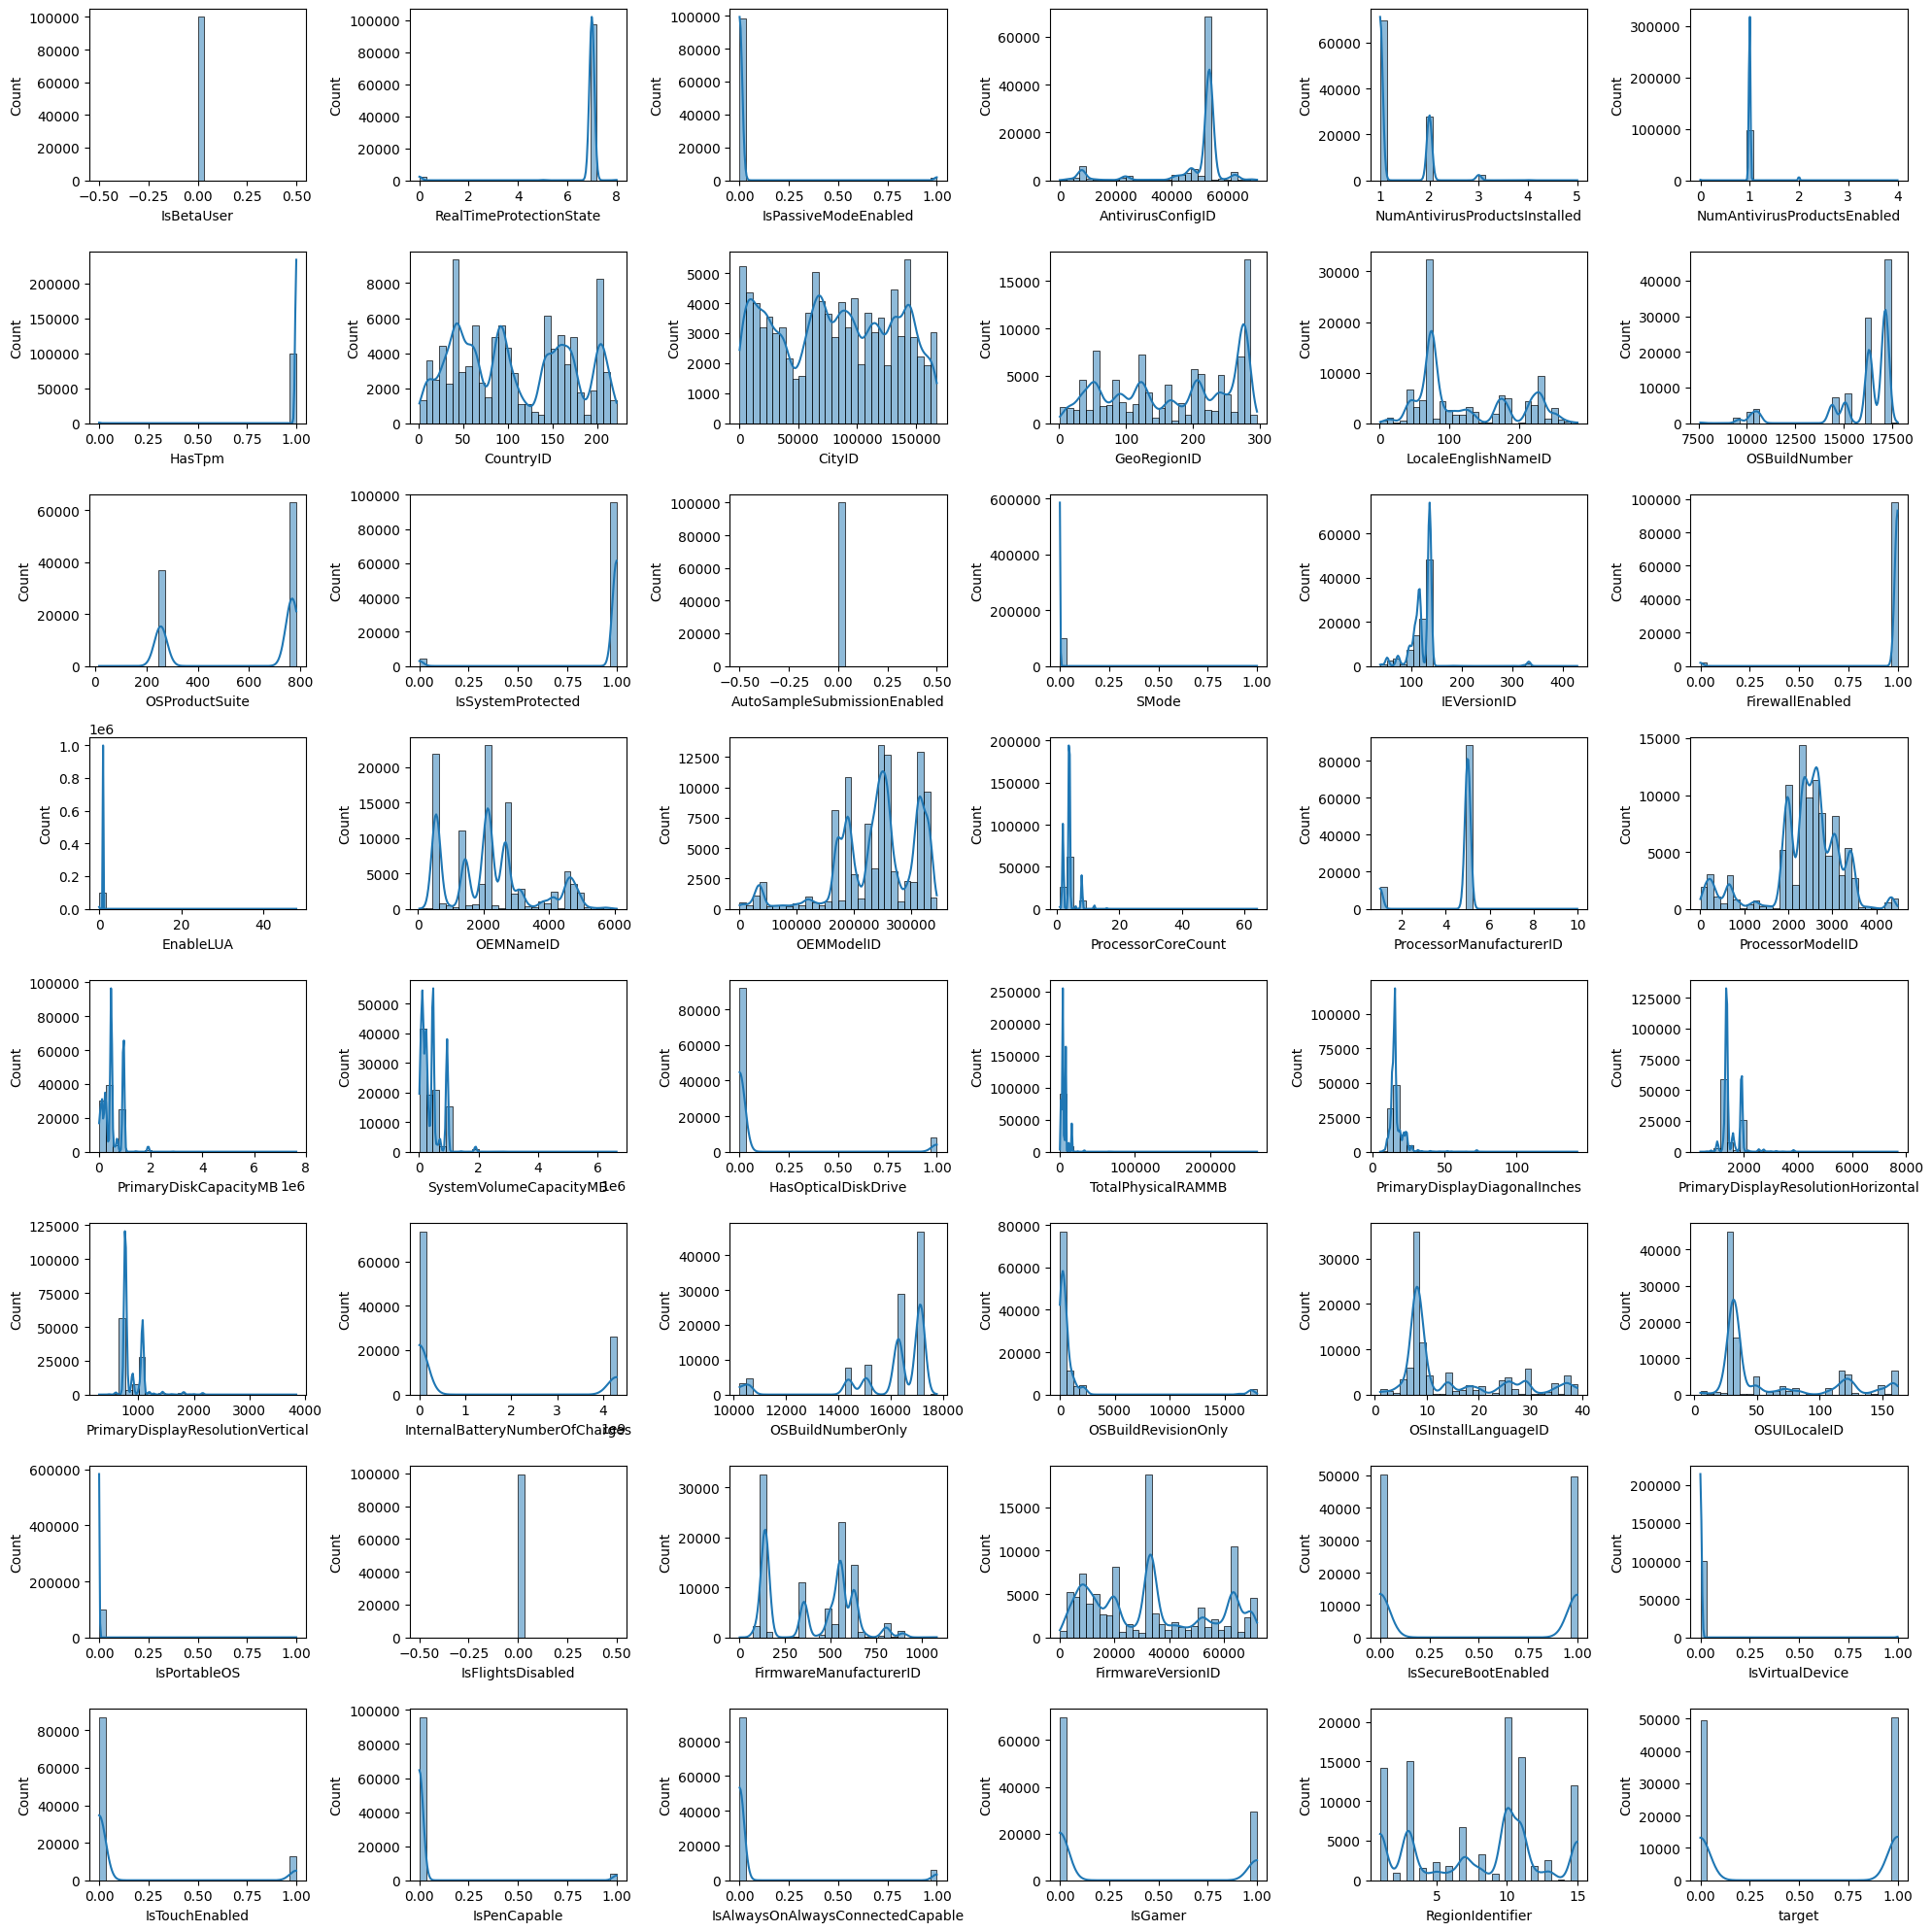

In [13]:
import seaborn as sns
fig, axes = plt.subplots(8, 6, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(df_train.select_dtypes(include=['int64','float64']).columns):
    sns.histplot(df_train[col],bins=30, kde=True, ax=axes[i])


plt.tight_layout()
plt.show()

* A number of features have extremely skewed distributions.
* The graphs have numerous peaks that indicate some high frequencies in the data.
* Certain features appear to be binary indicators because they only have 0/1 values.
* Multiple peaks are displayed by some features, suggesting that the dataset contains discrete clusters.

b) Correlation Heatmap of numerical columns

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


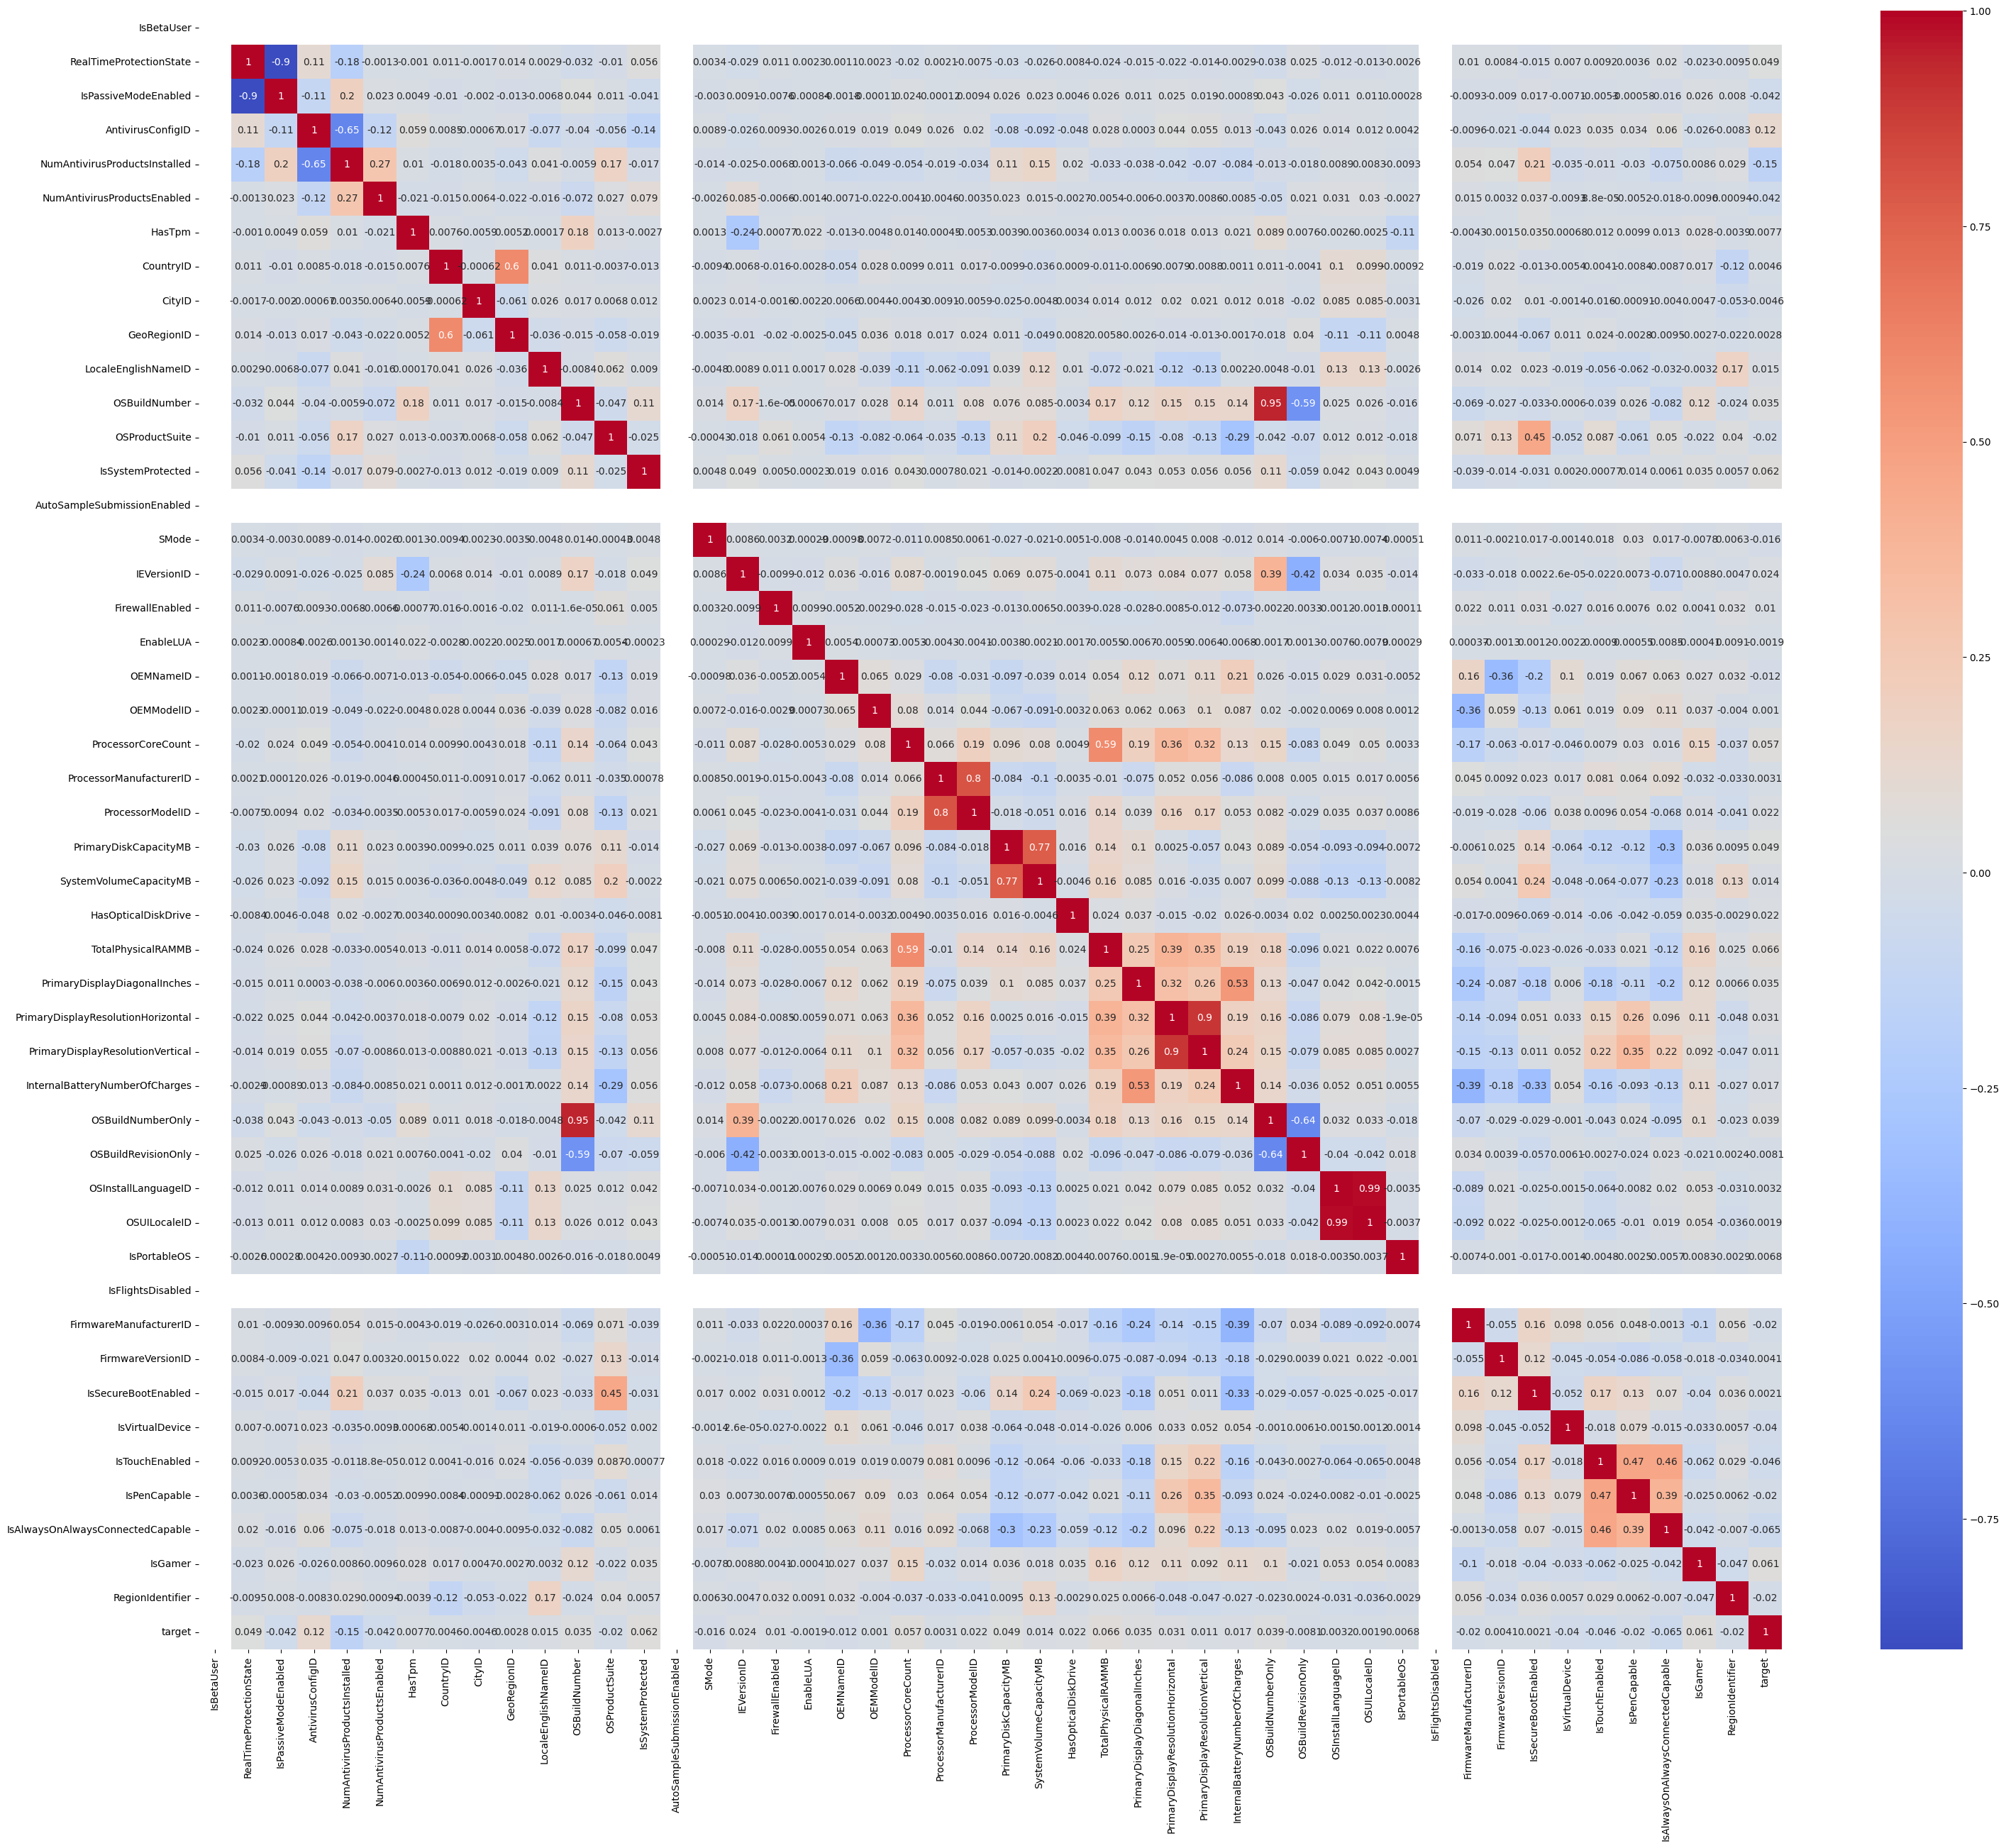

In [14]:
plt.figure(figsize=(36, 30))
sns.heatmap(df_train.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap='coolwarm')
plt.show()

* Correlation Heatmap of numerical columns gives us information about the correlation of columns.
* There are few columns that have correlation more than .90 which act as double.

c) Outliers in Dataset

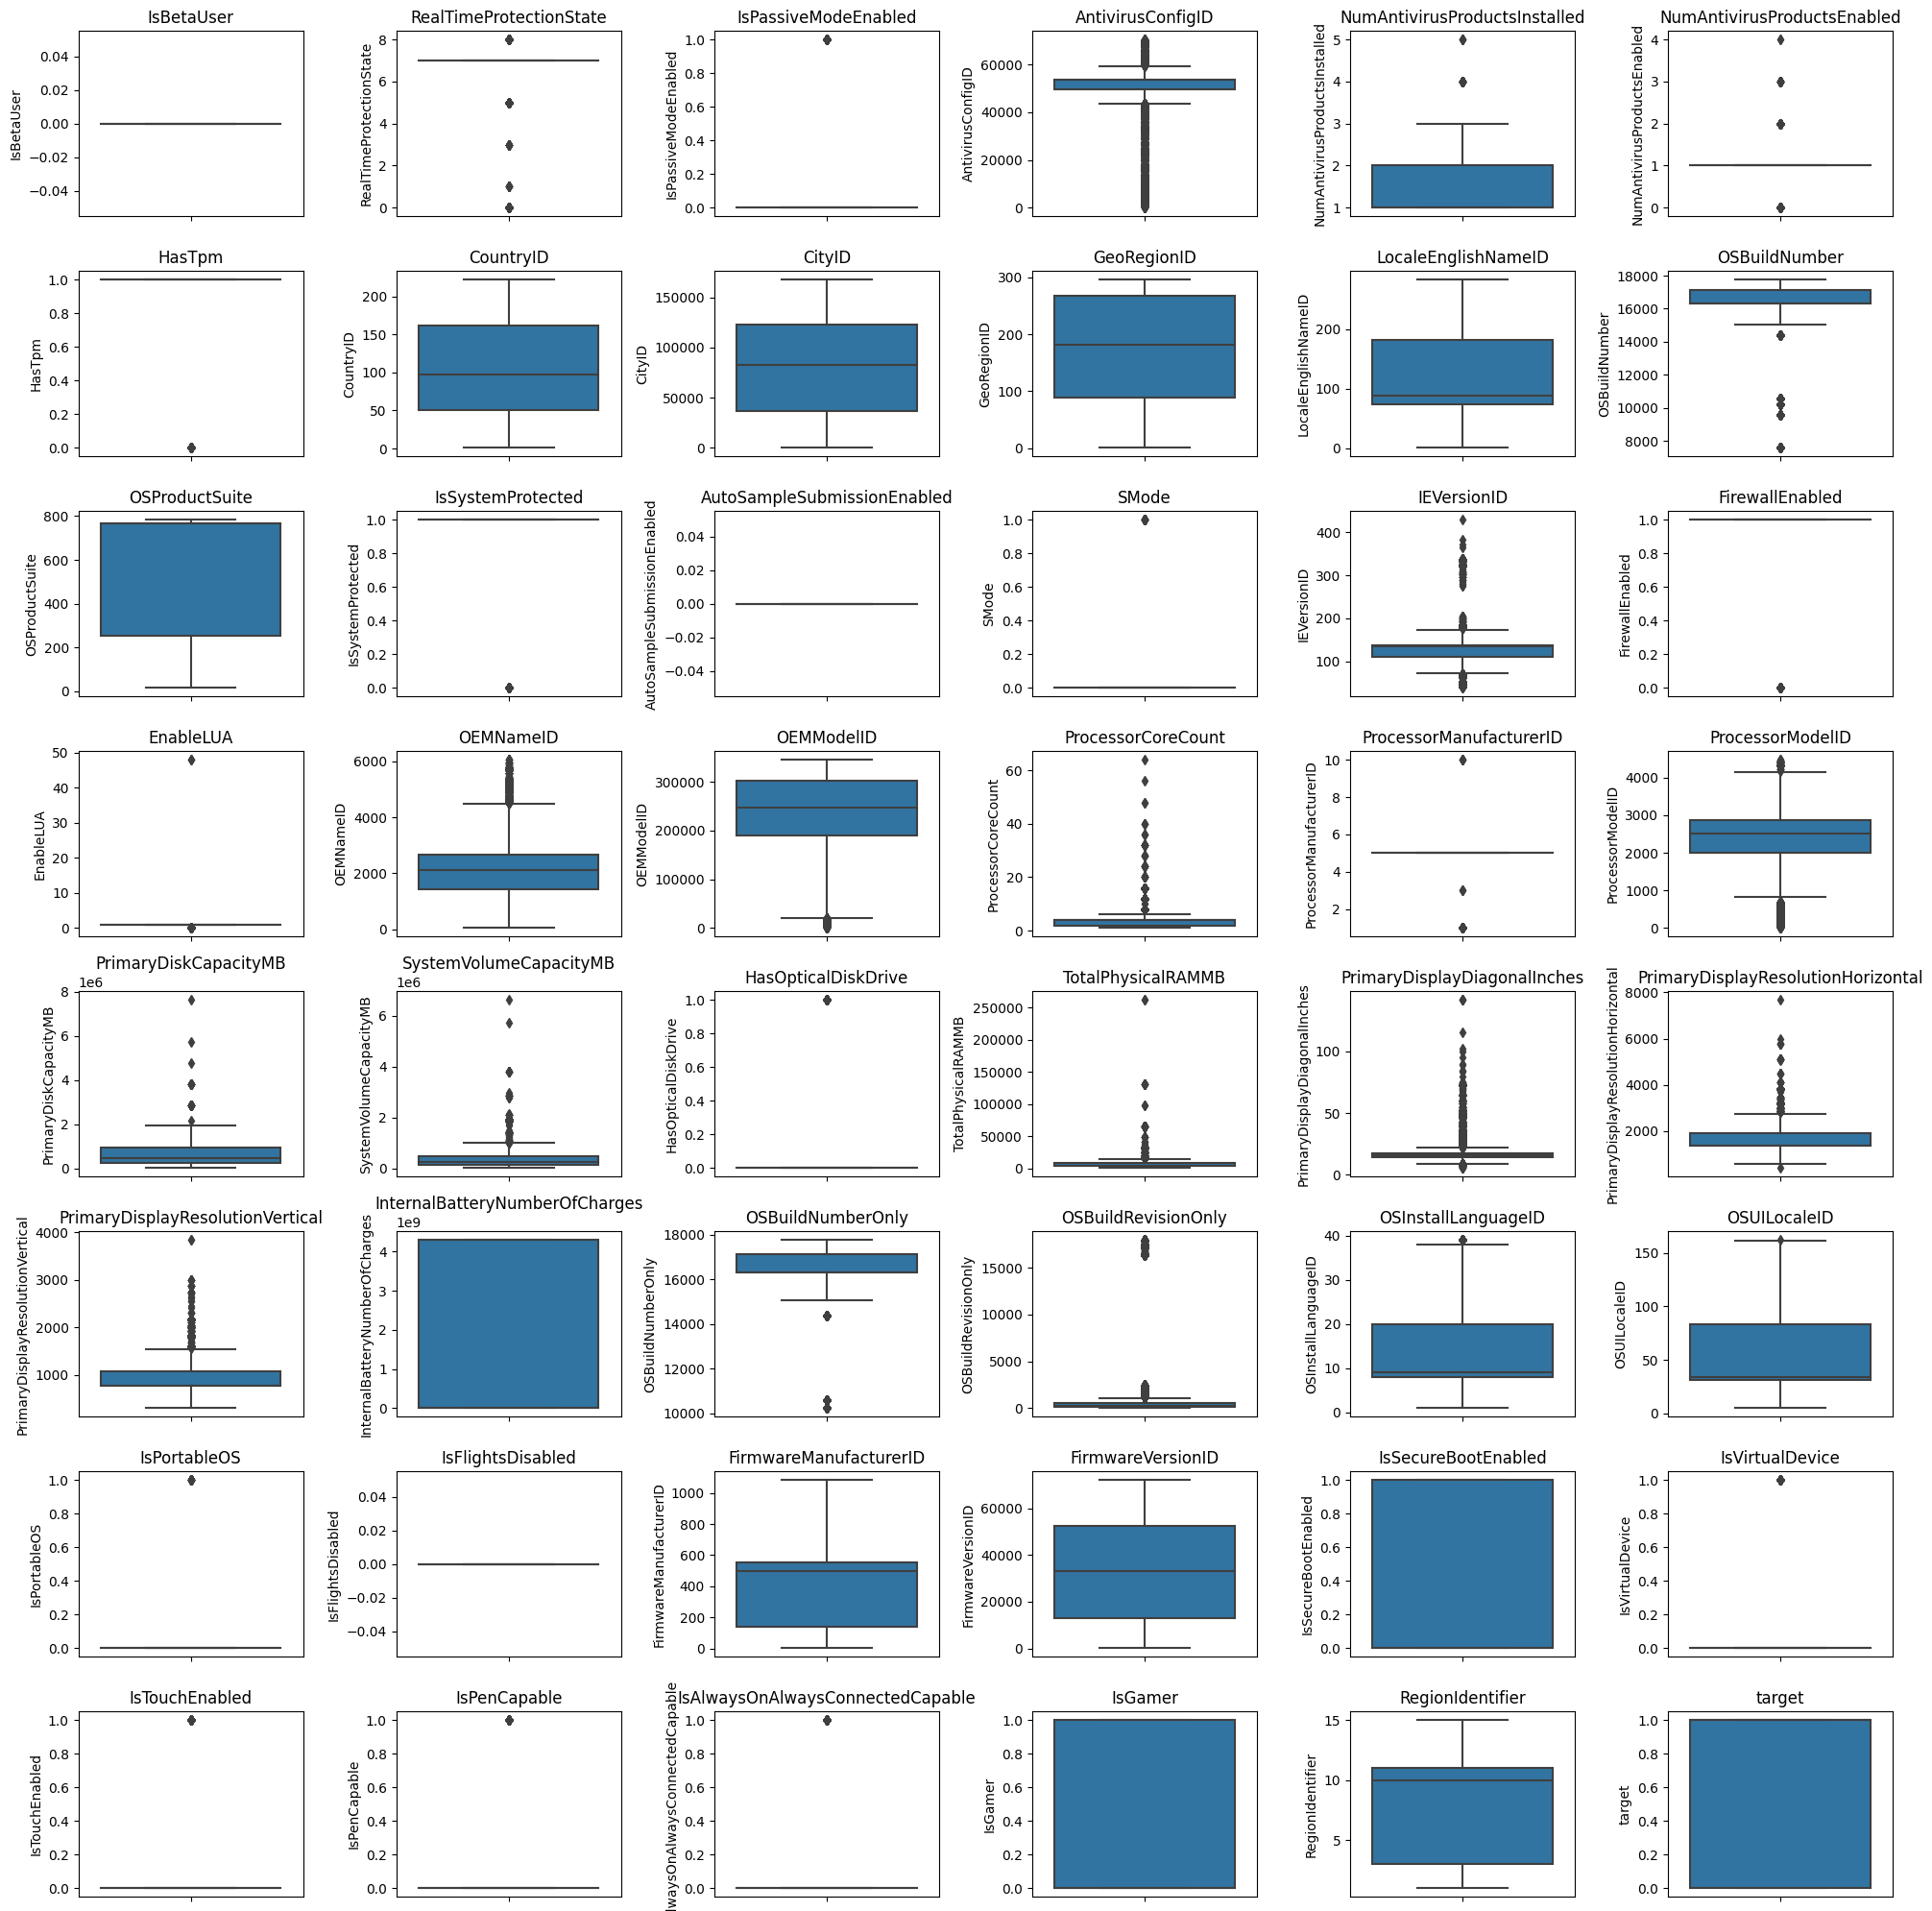

In [15]:
fig, axes = plt.subplots(8, 6, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(df_train.select_dtypes(include=['int64','float64']).columns):
    sns.boxplot(y=df_train[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

* Some columns contain outliers.  
* Certain columns have binary (0/1) values.  
* There are IDs in two columns and outliers in one column pertaining to display information.
* Due to high-end device configurations, many features, including ProcessorCoreCount, TotalPhysicalRAMMB and PrimaryDiskCapacityMB, display extreme values.

d) Histogram for 'target' column

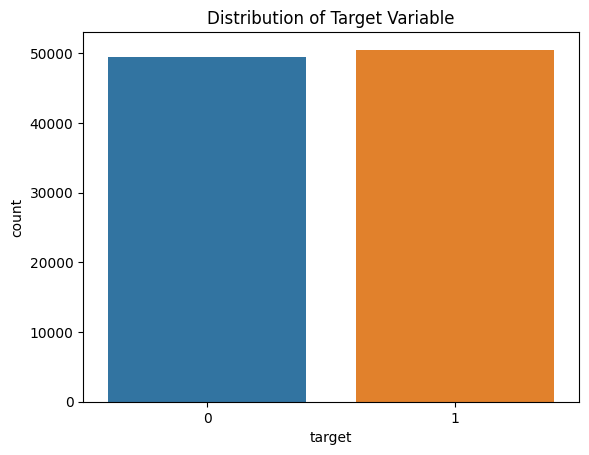

In [16]:
sns.countplot(x='target', data=df_train)
plt.title('Distribution of Target Variable')
plt.show()

* No class is dominant because the target variable has a nearly equal distribution of both classes (0 and 1).
* The possibility of model bias toward any specific class is decreased.

# **Step 4: Preprocessing**

**1. Drop some columns**

In [17]:
drop_cols = ['DateOS', 'DateAS']
df_train.drop(columns=drop_cols, inplace=True, errors='ignore')
df_test.drop(columns=drop_cols, inplace=True, errors='ignore')

**2. Cardinality**

a) Fetch cardiality of columns

In [18]:
cardinality = df_train.nunique().sort_values(ascending=False)
print(cardinality)

MachineID                      99835
SystemVolumeCapacityMB         46188
CityID                         16047
OEMModelID                     15952
FirmwareVersionID              12299
                               ...  
IsSystemProtected                  2
target                             2
IsFlightsDisabled                  1
IsBetaUser                         1
AutoSampleSubmissionEnabled        1
Length: 74, dtype: int64


* Cardinality gives us information about the total number of the unique values in the columns of the dataset.

b) Fetch and drop columns with cardinality = 1

In [19]:
cardinality_1 = cardinality[cardinality == 1].index.tolist()
print(cardinality_1)
df_train = df_train.drop(columns=cardinality_1)
df_test = df_test.drop(columns=cardinality_1)


['IsFlightsDisabled', 'IsBetaUser', 'AutoSampleSubmissionEnabled']


* Here I have droped some columns with cardinality 1.
* Cardinality 1 columns doesn't play any role in prediction as they are same all over dataset.

c) Droping columns with very high cardinality

In [20]:
threshold = 222
high_card_cols = [col for col in df_train.select_dtypes(include=['object']).columns if df_train[col].nunique() > threshold]
print(high_card_cols)

['MachineID', 'SignatureVersion', 'OSBuildLab']


* This is done for the categorical columns as there are few columns with very high cardinality.
* Very high cardinality columns are difficult to encode.

In [21]:
df_train = df_train.drop(columns=high_card_cols)
df_test = df_test.drop(columns=high_card_cols)

* I have droped categorical columns that have very high cardinality, as encoding these columns may take unecessary time.

**3. Correlation**

In [22]:
corr_matrix = df_train[df_train.select_dtypes(include=['int64','float64']).columns].corr()
corr_matrix

,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,...,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
RealTimeProtectionState,1.000000,-0.901426,0.107907,-0.184396,-0.001299,-0.001035,0.010743,-0.001671,0.013603,0.002851,...,0.010112,0.008421,-0.015123,0.007044,0.009187,0.003635,0.019879,-0.023005,-0.009479,0.049012
IsPassiveModeEnabled,-0.901426,1.000000,-0.111384,0.195344,0.023414,0.004929,-0.010327,-0.001968,-0.013213,-0.006799,...,-0.009343,-0.008979,0.017269,-0.007088,-0.005307,-0.000579,-0.016466,0.025863,0.007966,-0.041997
AntivirusConfigID,0.107907,-0.111384,1.000000,-0.647222,-0.115021,0.059230,0.008457,-0.000666,0.017477,-0.077096,...,-0.009623,-0.020802,-0.044251,0.023157,0.034506,0.033627,0.060264,-0.026385,-0.008294,0.118304
NumAntivirusProductsInstalled,-0.184396,0.195344,-0.647222,1.000000,0.273791,0.010237,-0.017957,0.003512,-0.042795,0.041475,...,0.054231,0.047223,0.210308,-0.035076,-0.011100,-0.029814,-0.075055,0.008620,0.028845,-0.151375
NumAntivirusProductsEnabled,-0.001299,0.023414,-0.115021,0.273791,1.000000,-0.020977,-0.014795,0.006448,-0.022393,-0.015629,...,0.015469,0.003158,0.037019,-0.009299,0.000088,-0.005245,-0.018295,-0.009562,0.000937,-0.041547
HasTpm,-0.001035,0.004929,0.059230,0.010237,-0.020977,1.000000,0.007648,-0.005940,0.005161,0.000168,...,-0.004301,-0.001458,0.035167,0.000676,0.011799,0.009900,0.013294,0.028136,-0.003924,0.007658
CountryID,0.010743,-0.010327,0.008457,-0.017957,-0.014795,0.007648,1.000000,-0.000624,0.597061,0.040761,...,-0.018788,0.021881,-0.013022,-0.005375,0.004135,-0.008432,-0.008681,0.017307,-0.117528,0.004616
CityID,-0.001671,-0.001968,-0.000666,0.003512,0.006448,-0.005940,-0.000624,1.000000,-0.060922,0.026268,...,-0.025710,0.019929,0.010010,-0.001436,-0.015534,-0.000909,-0.003993,0.004718,-0.052817,-0.004596
GeoRegionID,0.013603,-0.013213,0.017477,-0.042795,-0.022393,0.005161,0.597061,-0.060922,1.000000,-0.036492,...,-0.003138,0.004449,-0.067412,0.010703,0.023614,-0.002761,-0.009481,-0.002651,-0.022153,0.002802
LocaleEnglishNameID,0.002851,-0.006799,-0.077096,0.041475,-0.015629,0.000168,0.040761,0.026268,-0.036492,1.000000,...,0.014088,0.020028,0.023168,-0.019462,-0.056046,-0.061525,-0.032057,-0.003195,0.169065,0.015487


In [23]:
threshold = 0.90
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
print(to_drop)

['OSBuildNumberOnly', 'OSUILocaleID']


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


* Above code given us the highly correlated columns of the dataset.

In [24]:
df_train = df_train.drop(columns=to_drop)
df_test = df_test.drop(columns=to_drop)

* I have droped columns that are highly correlated because they work as duplicated columns.
* This affect the model performance.

**4. Filtering numrical and categorical data columns**

In [25]:
cat_df = df_train.select_dtypes(include=['object'])

In [26]:
num_df = df_train.select_dtypes(include=['int64','float64'])

**5. Handling Null Values**

a) Numerical Columns

In [27]:
from  sklearn.impute import SimpleImputer
imputer_n= SimpleImputer(strategy='median',missing_values=np.nan)
df_train[num_df.drop('target', axis=1).columns] = imputer_n.fit_transform(df_train[num_df.drop('target', axis=1).columns])

df_test[num_df.drop('target', axis=1).columns] = imputer_n.transform(df_test[num_df.drop('target', axis=1).columns])

* Handling missing values in numerical columns through strategy = 'median'.

b) Categorical Columns

In [28]:
from  sklearn.impute import SimpleImputer
imputer_m = SimpleImputer(strategy='most_frequent',missing_values=np.nan)
df_train[cat_df.columns] = imputer_m.fit_transform(df_train[cat_df.columns])

df_test[cat_df.columns]=imputer_m.transform(df_test[cat_df.columns])

* Handling missing values in categorical columns through strategy = 'most_frequent'.

**7. Encoding**

a) Importing libraries

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

b) Features filtering

In [30]:
features = ['ChassisType', 'OSEdition', 'OSSkuFriendlyName', 'OSBranch', 'NumericOSVersion', 'AppVersion', 'EngineVersion',
    'MDC2FormFactor', 'PowerPlatformRole', 'OSInstallType', 'OsPlatformSubRelease',
    'SKUEditionName', 'FlightRing', 'OSVersion', 'AutoUpdateOptionsName', 
    'LicenseActivationChannel', 'PrimaryDiskType', 'PlatformType', 'OSGenuineState', 
    'OSArchitecture', 'Processor', 'DeviceFamily', 'ProductName'
]

In [31]:
high_cardinality_cols = ['ChassisType', 'OSEdition', 'OSSkuFriendlyName', 'OSBranch', 'NumericOSVersion', 'AppVersion', 'EngineVersion']
low_cardinality_cols = [
    'MDC2FormFactor', 'PowerPlatformRole', 'OSInstallType', 'OsPlatformSubRelease',
    'SKUEditionName', 'FlightRing', 'OSVersion', 'AutoUpdateOptionsName', 
    'LicenseActivationChannel', 'PrimaryDiskType', 'PlatformType', 'OSGenuineState', 
    'OSArchitecture', 'Processor', 'DeviceFamily', 'ProductName'
]

c) Making transformers

In [32]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('ordinal_encoder', ordinal_encoder, high_cardinality_cols),
    ('onehot_encoder', onehot_encoder, low_cardinality_cols)
], remainder='passthrough')

d) Create Pipeline

In [33]:
pipeline = Pipeline([
    ('preprocessing', preprocessor)
])

e) Applying Pipeline

In [34]:
df_train_pipe = pipeline.fit_transform(df_train[features])
df_test_pipe = pipeline.transform(df_test)

f) Convert to DataFrame with proper column names

In [35]:
df_train_pipe = pd.DataFrame(df_train_pipe, columns=pipeline.get_feature_names_out(), index=df_train.index)
df_test_pipe = pd.DataFrame(df_test_pipe, columns=pipeline.get_feature_names_out(), index=df_test.index)

g) Returing final dataset

In [36]:
df_train = pd.concat([df_train.drop(columns=features), df_train_pipe], axis=1)
df_test = pd.concat([df_test.drop(columns=features), df_test_pipe], axis=1)

# **Step 5: Spiliting Dataset**

**1. Spilt dependent and independent features**

In [37]:
X = df_train.drop('target', axis=1)
y = df_train['target']

**2. Scaling**

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_test_scaled = scaler.transform(df_test)

* This code standardizes features using StandardScaler.
* Ensuring that all features have a mean of 0 and a standard deviation of 1.

**3. Split the data into training and validation sets**

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Step 6: Models Training**

**1. Base Models**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "xgb_model" :XGBClassifier()
}

* I have used 3 basic models.
* Logistic Regression because it is a simple, interpretable and effective baseline model for classification.
* Random Forest because it is good for complex patterns and combines multiple decision trees to improve performance.
* XGBoost because it is a powerful boosting algorithm, suitable for large datasets with complex relationships.

**2. Evaluation of Base models**

In [41]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = []

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, average='weighted'),
        "ROC-AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
        "Training Time (sec)": round(end_time - start_time, 4)
    })

results_df = pd.DataFrame(results)

print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision   Recall  F1-Score   ROC-AUC  \
0  Logistic Regression   0.60005   0.601036  0.60005  0.598153  0.636416   
1        Random Forest   0.61230   0.612266  0.61230  0.612116  0.654530   
2            xgb_model   0.62275   0.623128  0.62275  0.622010  0.667194   

   Training Time (sec)  
0               1.4124  
1              25.0032  
2               1.7634  


* Accuracy (62.28%), Precision (62.31%), Recall (62.28%), ROC-AUC (66.71%) and F1-Score (62.20%), are all highest for XGBoost.
* Because XGBoost performs better on all metrics, it is the best option.
* Although it requires more time to train, Random Forest is a good substitute.It is computationally costly, though, because its Training Time (23.35 sec) is much greater.
* Although logistic regression has the lowest predictive power, it is the fastest.
* This implies that XGBoost is the most dependable of the three models and has good generalization.

**3. Hyperparameter tuning**

a) Importing library

In [42]:
from sklearn.model_selection import GridSearchCV

b) Define the parameter grid

In [43]:
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.05, 0.1], 
    'max_depth': [3, 5, 7], 
    'subsample': [0.6, 0.8, 1.0]
}

c) GridSearchCV

In [44]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid, 
    cv=3, 
    scoring='accuracy', 
    verbose=2, 
    n_jobs=-1
)

d) Fit Grid Search

In [45]:
grid_search.fit(X_train, y_train)
# Get the best model
best_xgb = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


e) Evaluation

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best XGBoost Model Accuracy: {accuracy}")
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Best Parameters:", grid_search.best_params_)

Best XGBoost Model Accuracy: 0.62935
Confusion Matrix:
 [[5676 4202]
 [3211 6911]]
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


**f) XGBClassifier with (learning_rate = 0.1, 
                      max_depth = 5, 
                      n_estimators = 300, 
                      subsample = 0.8)**

* After hyperparameter tuning, XGBoost accuracy increased from 0.62275 to 0.6303
* Type 1 Error(False Positives:FP) decreased from 4158 to 4099.
* Type 2 Error(False Negatives:FN) decreased from 3387 to 3294.

In [51]:
model_1 = XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 300, subsample = 0.8)
model_1.fit(X_train , y_train)
y_pred = model_1.predict(X_test )
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))
print("ROC Score: ",roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

XGBoost Accuracy: 0.6303
Confusion Matrix:
 [[5779 4099]
 [3294 6828]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.59      0.61      9878
           1       0.62      0.67      0.65     10122

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000

ROC Score:  0.6671944602234596


# **Step 7: Predicting Test Data**

In [48]:
y_pred = model_1.predict(df_test_scaled)

# **Step 8: Submission file**

In [49]:
submission = pd.DataFrame({'id': range(10000), 'target': y_pred})
submission.to_csv('submission.csv', index=False)

print("Submission file created.")

Submission file created.


In [50]:
submission.shape

(10000, 2)